In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()
oo = sym.Dummy('oo', prime=True)
very_small = 1/oo
x = sym.symbols('x')

C_1, C_2, C_3, C_4 = sym.symbols('C_1, C_2, C_3, C_4')
A_v, B_v = sym.symbols('A_v, B_v')
ql, Vl, Ml, kappal, phil, wl = sym.symbols('q_z, V, M, kappa, phi, w')

In [2]:
L = 10
F = 35

EI, EI2, EI3 = sym.symbols('EI, EI2, EI3')

q = A_v * sym.SingularityFunction(x,0,-1) + F * sym.SingularityFunction(x,L/3,-1) + B_v * sym.SingularityFunction(x,L,-1)
display(sym.Eq(ql,q))

In [3]:
V = -sym.integrate(q, x) + C_1
display(sym.Eq(Vl,V))
M = sym.integrate(V, x) + C_2
display(sym.Eq(Ml,M))
kappa = M/EI + ((1-EI/EI2)/EI)*sym.SingularityFunction(x,L/3,0)*(A_v*L/3)  + ((1-EI/EI2)/EI)*sym.SingularityFunction(x,L/3,1)*(A_v+F) + ((1-EI2/EI3)/EI2)*sym.SingularityFunction(x,2*L/3,0)*(A_v*2*L/3+F*L/3)  + ((1-EI2/EI3)/EI2)*sym.SingularityFunction(x,2*L/3,1)*(A_v+F)
display(sym.Eq(kappal,kappa))
phi = sym.integrate(kappa, x) + C_3
display(sym.Eq(phil,phi))
w = -sym.integrate(phi, x) + C_4
display(sym.Eq(wl,w))

In [4]:
eq1 = sym.Eq(M.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,0),0)
eq3 = sym.Eq(M.subs(x,L),0)
eq4 = sym.Eq(w.subs(x,L),0)
eq5 = sym.Eq(V.subs(x,0-very_small),0).subs(oo,sym.oo)
eq6 = sym.Eq(V.subs(x,L+very_small),0).subs(oo,sym.oo)
display(eq1, eq2, eq3, eq4, eq5, eq6)

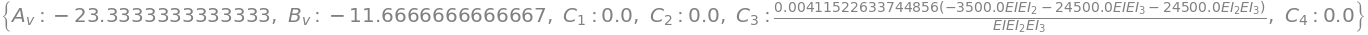

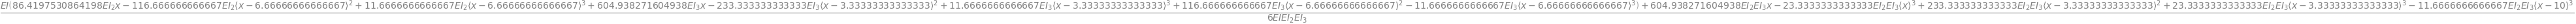

In [5]:
sol = sym.solve((eq1,eq2,eq3,eq4,eq5,eq6),(C_1,C_2,C_3,C_4,A_v,B_v))
display(sol)
display(w.subs(sol).factor(EI))

In [6]:
w_numpy = sym.lambdify(x, w.subs(sol).subs(EI,10000).subs(EI2,20000).subs(EI3,5000).rewrite(sym.Piecewise))

0.04906121399176976
0.04047199183043862


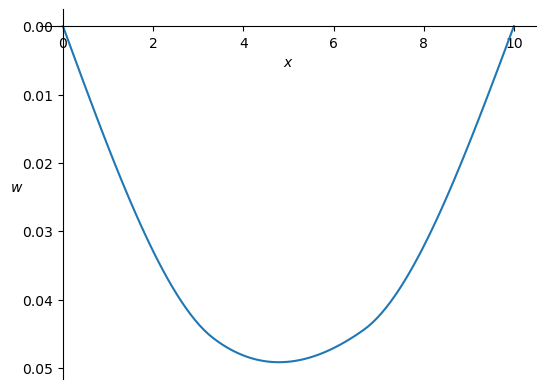

In [7]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,w_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$w$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()
print(w_numpy(5))
print(w_numpy(7.24562))

In [8]:
V_numpy = sym.lambdify(x, V.subs(sol).subs(EI,10000).subs(EI2,20000).subs(EI3,5000).rewrite(sym.Piecewise))

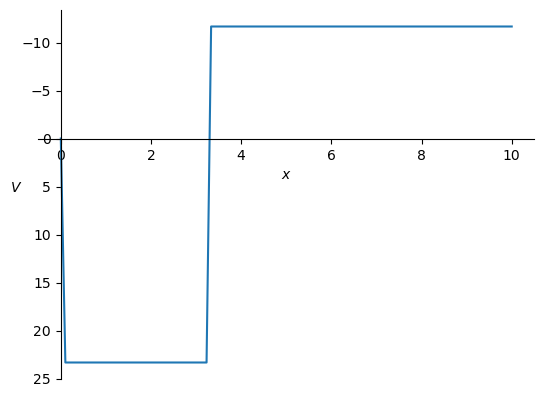

In [9]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,V_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$V$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [10]:
M_numpy = sym.lambdify(x, M.subs(sol).subs(EI,10000).subs(EI2,20000).subs(EI3,5000).rewrite(sym.Piecewise))

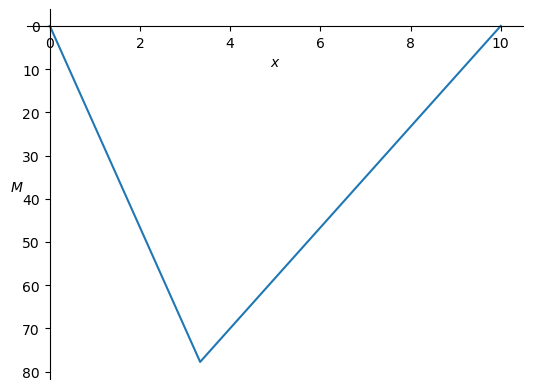

In [11]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,M_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$M$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [12]:
kappa_numpy = sym.lambdify(x, kappa.subs(sol).subs(EI,10000).subs(EI2,20000).subs(EI3,5000).rewrite(sym.Piecewise))

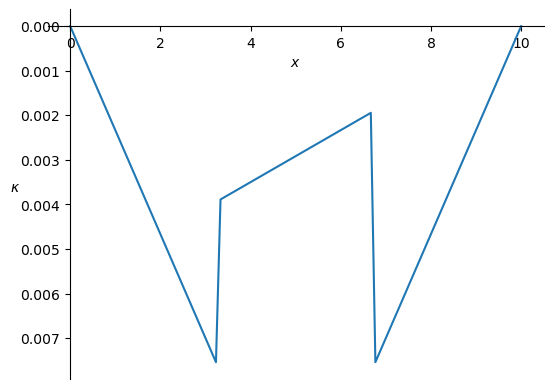

In [13]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,kappa_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$\kappa$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()